In [5]:
%load_ext autoreload
%autoreload 2
import os
import json
from tqdm import tqdm
import torch 
import torch.nn as nn
import models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim import Adam
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
print(f"device avaible : {'cuda' if torch.cuda.is_available() else 'cpu'}")
from torch.nn import Conv2d, Linear

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device avaible : cuda


# **Dataset**

Création de deux datasets distincts : 
- A contient les images des classes de 0 à 4
- B contient les images des classes de 5 à 9 

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9137255..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6156863..0.90588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.9607843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8117647..0.5529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.77254903..1.0].


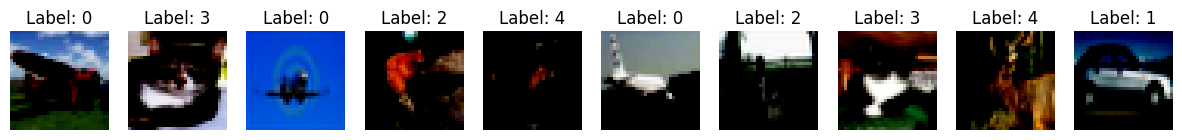

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7411765..0.8352941].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8745098..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.84313726..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8039216..0.6784314].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping inp

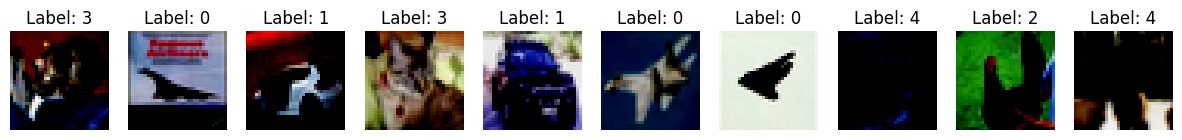

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.94509804].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to 

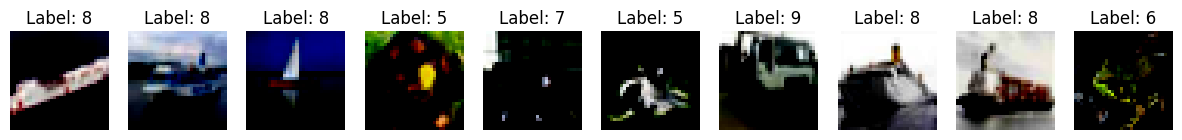

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9372549].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9764706..0.9764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..0.7254902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.654902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.6156863].
Clipping 

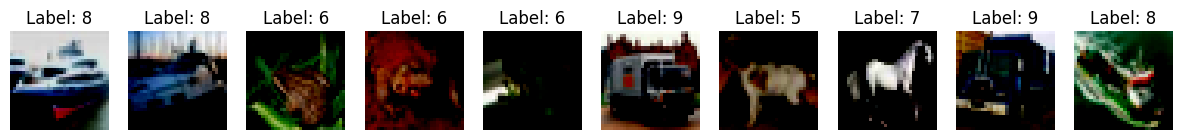

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


train_set, val_set = train_test_split(list(range(len(cifar10))), test_size=0.2, random_state=42)

def create_subset(dataset, indices, class_range):
    subset_indices = [i for i in indices if dataset.targets[i] in class_range]
    return Subset(dataset, subset_indices)

train_set_A = create_subset(cifar10, train_set, range(0, 5))
train_set_B = create_subset(cifar10, train_set, range(5, 10))

# val_set_A = create_subset(cifar10, val_set, range(0, 5))
# val_set_B = create_subset(cifar10, val_set, range(5, 10))


train_loader_A = DataLoader(train_set_A, batch_size=64, shuffle=True)
train_loader_B = DataLoader(train_set_B, batch_size=64, shuffle=True)

# val_loader_A = DataLoader(val_set_A, batch_size=64, shuffle=False)
# val_loader_B = DataLoader(val_set_B, batch_size=64, shuffle=False)

test_loader_A = DataLoader(create_subset(cifar10_test, range(len(cifar10_test)), range(0, 5)), batch_size=64, shuffle=False)
test_loader_B = DataLoader(create_subset(cifar10_test, range(len(cifar10_test)), range(5, 10)), batch_size=64, shuffle=False)

def visualize_dataloader_samples(dataloader, num_samples=10):
    images, labels = next(iter(dataloader))
    images = images[:num_samples]
    labels = labels[:num_samples]
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, (image, label) in enumerate(zip(images, labels)):
        axes[i].imshow(image.permute(1, 2, 0), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"Label: {label.item()}")
    plt.show()


visualize_dataloader_samples(train_loader_A)
visualize_dataloader_samples(test_loader_A)
visualize_dataloader_samples(train_loader_B)
visualize_dataloader_samples(test_loader_B)

In [3]:
loss_fn = nn.CrossEntropyLoss()
path = "./resultats_cifar/"

resA  = []
resB = []
print("Entrainement du modèle A")
print()
for _ in range(5): 
    modelA = models.CNN_cifar()
    modelA.to(device)
    optimizerA = Adam(modelA.parameters())
    modelA.train_model(train_loader_A,test_loader_A, loss_fn, n_epochs=10, optimizer=optimizerA)
    resA.append(modelA.test(test_loader_A))
torch.save(modelA, "./models_cifar/baseA.torch")

print()
print("Entrainement du modèle B")
print()
for _ in range(5): 
    modelB = models.CNN_cifar()
    optimizerB= Adam(modelB.parameters())
    modelB.train_model(train_loader_B,test_loader_B, loss_fn, n_epochs=10, optimizer=optimizerB)
    resB.append(modelB.test(test_loader_B))
torch.save(modelB, "./models_cifar/baseB.torch")

with open(os.path.join(path, "base.json"), 'a') as file:
        json.dump({"model A" : resA}, file)
        json.dump({"model B" : resB}, file)

Entrainement du modèle A

using device cuda
Epoch 1, Loss: 1.2493
Test set: Avg. loss: 1.0153, Accuracy: 2956/5000 (59.12%)
Epoch 2, Loss: 0.9512
Test set: Avg. loss: 0.8920, Accuracy: 3189/5000 (63.78%)
Epoch 3, Loss: 0.8612
Test set: Avg. loss: 0.8687, Accuracy: 3285/5000 (65.70%)
Epoch 4, Loss: 0.7778
Test set: Avg. loss: 0.8122, Accuracy: 3411/5000 (68.22%)
Epoch 5, Loss: 0.6839
Test set: Avg. loss: 0.8288, Accuracy: 3373/5000 (67.46%)
Epoch 6, Loss: 0.5778
Test set: Avg. loss: 0.8147, Accuracy: 3472/5000 (69.44%)
Epoch 7, Loss: 0.4331
Test set: Avg. loss: 0.9086, Accuracy: 3424/5000 (68.48%)
Epoch 8, Loss: 0.2817
Test set: Avg. loss: 1.1422, Accuracy: 3399/5000 (67.98%)
Epoch 9, Loss: 0.1762
Test set: Avg. loss: 1.2862, Accuracy: 3375/5000 (67.50%)
Epoch 10, Loss: 0.1163
Test set: Avg. loss: 1.6133, Accuracy: 3363/5000 (67.26%)
Test set: Avg. loss: 1.6133, Accuracy: 3363/5000 (67.26%)
using device cuda
Epoch 1, Loss: 1.2301
Test set: Avg. loss: 1.0229, Accuracy: 2842/5000 (56.84%)

# Modèle BNB

In [10]:
path = "./resultats_cifar/"
basemodel = torch.load("./models_cifar/baseB.torch")
loss_fn = nn.CrossEntropyLoss()

def get_trainable_layer_indices(model):
    return [i for i, layer in enumerate(model.model) if isinstance(layer, (Conv2d, Linear))]


trainable_indices = get_trainable_layer_indices(basemodel)
final = {}
for j in tqdm(range(1, len(trainable_indices) ), desc="Etape "):
    l = []
    for _ in range(5):
        newmodel = models.CNN_cifar()
        for i in trainable_indices[:j]:
            newmodel.model[i] = basemodel.model[i]
            for param in newmodel.model[i].parameters():
                param.requires_grad = False

        optimizer = Adam(filter(lambda p: p.requires_grad, newmodel.parameters()))
        newmodel.train_model(train_loader_B, test_loader_B, loss_fn, n_epochs=7, optimizer=optimizer)
        l.append(newmodel.test(test_loader_B))

    res = {
        "model base": "B",
        "couche copiees": j,
        "couche reentrainees": 8 - j,
        "resultats": l
    }
    final[j] = res
with open(os.path.join(path, "BNB.json"), 'w') as file:
    json.dump(final, file, indent=4)

/tmp/ipykernel_7521/608688567.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  basemodel = torch.load("./models_cifar/baseB.torch")
Etape :   0%|          | 0/7 [00:00<?,

using device cuda
Epoch 1, Loss: 1.0110
Test set: Avg. loss: 0.7671, Accuracy: 3507/5000 (70.14%)
Epoch 2, Loss: 0.7188
Test set: Avg. loss: 0.6554, Accuracy: 3762/5000 (75.24%)
Epoch 3, Loss: 0.5980
Test set: Avg. loss: 0.6395, Accuracy: 3820/5000 (76.40%)
Epoch 4, Loss: 0.5180
Test set: Avg. loss: 0.6002, Accuracy: 3909/5000 (78.18%)
Epoch 5, Loss: 0.4108
Test set: Avg. loss: 0.6162, Accuracy: 3925/5000 (78.50%)
Epoch 6, Loss: 0.3087
Test set: Avg. loss: 0.7183, Accuracy: 3864/5000 (77.28%)
Epoch 7, Loss: 0.1937
Test set: Avg. loss: 0.8458, Accuracy: 3893/5000 (77.86%)
Test set: Avg. loss: 0.8458, Accuracy: 3893/5000 (77.86%)
using device cuda
Epoch 1, Loss: 1.0090
Test set: Avg. loss: 0.7792, Accuracy: 3448/5000 (68.96%)
Epoch 2, Loss: 0.6995
Test set: Avg. loss: 0.6553, Accuracy: 3777/5000 (75.54%)
Epoch 3, Loss: 0.5914
Test set: Avg. loss: 0.6657, Accuracy: 3811/5000 (76.22%)
Epoch 4, Loss: 0.5024
Test set: Avg. loss: 0.5692, Accuracy: 3947/5000 (78.94%)
Epoch 5, Loss: 0.4280
Test

Etape :  14%|█▍        | 1/7 [03:59<23:59, 239.95s/it]

Test set: Avg. loss: 0.7563, Accuracy: 3981/5000 (79.62%)
using device cuda
Epoch 1, Loss: 0.9822
Test set: Avg. loss: 0.7382, Accuracy: 3583/5000 (71.66%)
Epoch 2, Loss: 0.6642
Test set: Avg. loss: 0.6804, Accuracy: 3737/5000 (74.74%)
Epoch 3, Loss: 0.5711
Test set: Avg. loss: 0.6024, Accuracy: 3883/5000 (77.66%)
Epoch 4, Loss: 0.4698
Test set: Avg. loss: 0.5704, Accuracy: 3958/5000 (79.16%)
Epoch 5, Loss: 0.3728
Test set: Avg. loss: 0.5885, Accuracy: 3910/5000 (78.20%)
Epoch 6, Loss: 0.2601
Test set: Avg. loss: 0.7104, Accuracy: 3963/5000 (79.26%)
Epoch 7, Loss: 0.1672
Test set: Avg. loss: 0.8500, Accuracy: 3934/5000 (78.68%)
Test set: Avg. loss: 0.8500, Accuracy: 3934/5000 (78.68%)
using device cuda
Epoch 1, Loss: 0.9308
Test set: Avg. loss: 0.7039, Accuracy: 3652/5000 (73.04%)
Epoch 2, Loss: 0.6570
Test set: Avg. loss: 0.6263, Accuracy: 3838/5000 (76.76%)
Epoch 3, Loss: 0.5652
Test set: Avg. loss: 0.5893, Accuracy: 3879/5000 (77.58%)
Epoch 4, Loss: 0.4856
Test set: Avg. loss: 0.612

Etape :  29%|██▊       | 2/7 [07:56<19:50, 238.13s/it]

Test set: Avg. loss: 0.8071, Accuracy: 3919/5000 (78.38%)
using device cuda
Epoch 1, Loss: 0.8633
Test set: Avg. loss: 0.6620, Accuracy: 3725/5000 (74.50%)
Epoch 2, Loss: 0.6141
Test set: Avg. loss: 0.6901, Accuracy: 3759/5000 (75.18%)
Epoch 3, Loss: 0.5102
Test set: Avg. loss: 0.5749, Accuracy: 3954/5000 (79.08%)
Epoch 4, Loss: 0.4002
Test set: Avg. loss: 0.6076, Accuracy: 3902/5000 (78.04%)
Epoch 5, Loss: 0.2758
Test set: Avg. loss: 0.6477, Accuracy: 3905/5000 (78.10%)
Epoch 6, Loss: 0.1634
Test set: Avg. loss: 0.8237, Accuracy: 3918/5000 (78.36%)
Epoch 7, Loss: 0.0980
Test set: Avg. loss: 0.9892, Accuracy: 3940/5000 (78.80%)
Test set: Avg. loss: 0.9892, Accuracy: 3940/5000 (78.80%)
using device cuda
Epoch 1, Loss: 0.8093
Test set: Avg. loss: 0.6745, Accuracy: 3695/5000 (73.90%)
Epoch 2, Loss: 0.6126
Test set: Avg. loss: 0.6445, Accuracy: 3796/5000 (75.92%)
Epoch 3, Loss: 0.4973
Test set: Avg. loss: 0.5872, Accuracy: 3906/5000 (78.12%)
Epoch 4, Loss: 0.3825
Test set: Avg. loss: 0.654

Etape :  43%|████▎     | 3/7 [11:50<15:43, 235.89s/it]

Test set: Avg. loss: 0.8907, Accuracy: 3978/5000 (79.56%)
using device cuda
Epoch 1, Loss: 0.7522
Test set: Avg. loss: 0.6830, Accuracy: 3713/5000 (74.26%)
Epoch 2, Loss: 0.5591
Test set: Avg. loss: 0.6150, Accuracy: 3839/5000 (76.78%)
Epoch 3, Loss: 0.4283
Test set: Avg. loss: 0.6541, Accuracy: 3864/5000 (77.28%)
Epoch 4, Loss: 0.2881
Test set: Avg. loss: 0.6566, Accuracy: 3946/5000 (78.92%)
Epoch 5, Loss: 0.1664
Test set: Avg. loss: 0.7368, Accuracy: 3911/5000 (78.22%)
Epoch 6, Loss: 0.0844
Test set: Avg. loss: 0.9064, Accuracy: 3890/5000 (77.80%)
Epoch 7, Loss: 0.0738
Test set: Avg. loss: 1.1394, Accuracy: 3869/5000 (77.38%)
Test set: Avg. loss: 1.1394, Accuracy: 3869/5000 (77.38%)
using device cuda
Epoch 1, Loss: 0.7719
Test set: Avg. loss: 0.6709, Accuracy: 3697/5000 (73.94%)
Epoch 2, Loss: 0.5632
Test set: Avg. loss: 0.6074, Accuracy: 3888/5000 (77.76%)
Epoch 3, Loss: 0.4417
Test set: Avg. loss: 0.5868, Accuracy: 3925/5000 (78.50%)
Epoch 4, Loss: 0.3190
Test set: Avg. loss: 0.626

Etape :  57%|█████▋    | 4/7 [15:41<11:42, 234.24s/it]

Test set: Avg. loss: 0.9537, Accuracy: 3930/5000 (78.60%)
using device cuda
Epoch 1, Loss: 0.6933
Test set: Avg. loss: 0.6504, Accuracy: 3799/5000 (75.98%)
Epoch 2, Loss: 0.4959
Test set: Avg. loss: 0.6202, Accuracy: 3883/5000 (77.66%)
Epoch 3, Loss: 0.3514
Test set: Avg. loss: 0.7201, Accuracy: 3869/5000 (77.38%)
Epoch 4, Loss: 0.2123
Test set: Avg. loss: 0.7957, Accuracy: 3873/5000 (77.46%)
Epoch 5, Loss: 0.1342
Test set: Avg. loss: 0.8444, Accuracy: 3885/5000 (77.70%)
Epoch 6, Loss: 0.0787
Test set: Avg. loss: 1.0936, Accuracy: 3891/5000 (77.82%)
Epoch 7, Loss: 0.0624
Test set: Avg. loss: 1.1213, Accuracy: 3894/5000 (77.88%)
Test set: Avg. loss: 1.1213, Accuracy: 3894/5000 (77.88%)
using device cuda
Epoch 1, Loss: 0.7000
Test set: Avg. loss: 0.6254, Accuracy: 3840/5000 (76.80%)
Epoch 2, Loss: 0.5055
Test set: Avg. loss: 0.6184, Accuracy: 3857/5000 (77.14%)
Epoch 3, Loss: 0.3610
Test set: Avg. loss: 0.6822, Accuracy: 3856/5000 (77.12%)
Epoch 4, Loss: 0.2245
Test set: Avg. loss: 0.752

Etape :  71%|███████▏  | 5/7 [19:21<07:37, 228.96s/it]

Test set: Avg. loss: 1.1539, Accuracy: 3883/5000 (77.66%)
using device cuda
Epoch 1, Loss: 0.1216
Test set: Avg. loss: 1.2015, Accuracy: 3866/5000 (77.32%)
Epoch 2, Loss: 0.0298
Test set: Avg. loss: 1.4635, Accuracy: 3878/5000 (77.56%)
Epoch 3, Loss: 0.0253
Test set: Avg. loss: 1.5912, Accuracy: 3877/5000 (77.54%)
Epoch 4, Loss: 0.0183
Test set: Avg. loss: 1.7486, Accuracy: 3896/5000 (77.92%)
Epoch 5, Loss: 0.0166
Test set: Avg. loss: 1.9323, Accuracy: 3884/5000 (77.68%)
Epoch 6, Loss: 0.0133
Test set: Avg. loss: 2.0309, Accuracy: 3893/5000 (77.86%)
Epoch 7, Loss: 0.0168
Test set: Avg. loss: 2.0730, Accuracy: 3894/5000 (77.88%)
Test set: Avg. loss: 2.0730, Accuracy: 3894/5000 (77.88%)
using device cuda
Epoch 1, Loss: 0.1164
Test set: Avg. loss: 1.1787, Accuracy: 3885/5000 (77.70%)
Epoch 2, Loss: 0.0357
Test set: Avg. loss: 1.4250, Accuracy: 3897/5000 (77.94%)
Epoch 3, Loss: 0.0256
Test set: Avg. loss: 1.5812, Accuracy: 3905/5000 (78.10%)
Epoch 4, Loss: 0.0230
Test set: Avg. loss: 1.706

Etape :  86%|████████▌ | 6/7 [20:59<03:04, 184.39s/it]

Test set: Avg. loss: 2.2460, Accuracy: 3865/5000 (77.30%)
using device cuda
Epoch 1, Loss: 0.1415
Test set: Avg. loss: 0.8957, Accuracy: 3909/5000 (78.18%)
Epoch 2, Loss: 0.0411
Test set: Avg. loss: 1.0441, Accuracy: 3900/5000 (78.00%)
Epoch 3, Loss: 0.0349
Test set: Avg. loss: 1.1406, Accuracy: 3894/5000 (77.88%)
Epoch 4, Loss: 0.0331
Test set: Avg. loss: 1.2150, Accuracy: 3906/5000 (78.12%)
Epoch 5, Loss: 0.0300
Test set: Avg. loss: 1.2700, Accuracy: 3905/5000 (78.10%)
Epoch 6, Loss: 0.0298
Test set: Avg. loss: 1.2995, Accuracy: 3916/5000 (78.32%)
Epoch 7, Loss: 0.0323
Test set: Avg. loss: 1.3207, Accuracy: 3905/5000 (78.10%)
Test set: Avg. loss: 1.3207, Accuracy: 3905/5000 (78.10%)
using device cuda
Epoch 1, Loss: 0.1222
Test set: Avg. loss: 0.9128, Accuracy: 3895/5000 (77.90%)
Epoch 2, Loss: 0.0401
Test set: Avg. loss: 1.0586, Accuracy: 3898/5000 (77.96%)
Epoch 3, Loss: 0.0354
Test set: Avg. loss: 1.1494, Accuracy: 3895/5000 (77.90%)
Epoch 4, Loss: 0.0338
Test set: Avg. loss: 1.211

Etape : 100%|██████████| 7/7 [22:31<00:00, 193.07s/it]

Test set: Avg. loss: 1.3347, Accuracy: 3912/5000 (78.24%)


# Modèle ANB

In [11]:
basemodel = torch.load("./models_cifar/baseA.torch")
loss_fn = nn.CrossEntropyLoss()

trainable_indices = get_trainable_layer_indices(basemodel)
final = {}
for j in tqdm(range(1, len(trainable_indices) ), desc="Etape "):
    l = []
    for _ in range(5):
        newmodel = models.CNN_cifar()
        for i in trainable_indices[:j]:
            newmodel.model[i] = basemodel.model[i]
            for param in newmodel.model[i].parameters():
                param.requires_grad = False

        optimizer = Adam(filter(lambda p: p.requires_grad, newmodel.parameters()))
        newmodel.train_model(train_loader_B, test_loader_B, loss_fn, n_epochs=7, optimizer=optimizer)
        l.append(newmodel.test(test_loader_B))

    res = {
        "model base": "B",
        "couche copiees": j,
        "couche reentrainees": 8 - j,
        "resultats": l
    }
    final[j] = res
with open(os.path.join(path, "ANB.json"), 'w') as file:
    json.dump(final, file, indent=4)

/tmp/ipykernel_7521/3196116853.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  basemodel = torch.load("./models_cifar/baseA.torch")
Etape :   0%|          | 0/7 [00:00<?

using device cuda
Epoch 1, Loss: 1.0571
Test set: Avg. loss: 0.8211, Accuracy: 3399/5000 (67.98%)
Epoch 2, Loss: 0.7384
Test set: Avg. loss: 0.6540, Accuracy: 3763/5000 (75.26%)
Epoch 3, Loss: 0.6209
Test set: Avg. loss: 0.6619, Accuracy: 3757/5000 (75.14%)
Epoch 4, Loss: 0.5303
Test set: Avg. loss: 0.5885, Accuracy: 3958/5000 (79.16%)
Epoch 5, Loss: 0.4757
Test set: Avg. loss: 0.5412, Accuracy: 4032/5000 (80.64%)
Epoch 6, Loss: 0.3932
Test set: Avg. loss: 0.5458, Accuracy: 4032/5000 (80.64%)
Epoch 7, Loss: 0.3127
Test set: Avg. loss: 0.6071, Accuracy: 3972/5000 (79.44%)
Test set: Avg. loss: 0.6071, Accuracy: 3972/5000 (79.44%)
using device cuda
Epoch 1, Loss: 1.0970
Test set: Avg. loss: 0.7915, Accuracy: 3486/5000 (69.72%)
Epoch 2, Loss: 0.7387
Test set: Avg. loss: 0.6546, Accuracy: 3760/5000 (75.20%)
Epoch 3, Loss: 0.6159
Test set: Avg. loss: 0.6492, Accuracy: 3800/5000 (76.00%)
Epoch 4, Loss: 0.5461
Test set: Avg. loss: 0.5567, Accuracy: 3982/5000 (79.64%)
Epoch 5, Loss: 0.4601
Test

Etape :  14%|█▍        | 1/7 [03:56<23:37, 236.18s/it]

Test set: Avg. loss: 0.6607, Accuracy: 4061/5000 (81.22%)
using device cuda
Epoch 1, Loss: 0.9345
Test set: Avg. loss: 0.7429, Accuracy: 3592/5000 (71.84%)
Epoch 2, Loss: 0.6502
Test set: Avg. loss: 0.6111, Accuracy: 3842/5000 (76.84%)
Epoch 3, Loss: 0.5663
Test set: Avg. loss: 0.5623, Accuracy: 3956/5000 (79.12%)
Epoch 4, Loss: 0.4779
Test set: Avg. loss: 0.5588, Accuracy: 3978/5000 (79.56%)
Epoch 5, Loss: 0.3925
Test set: Avg. loss: 0.5549, Accuracy: 3995/5000 (79.90%)
Epoch 6, Loss: 0.2990
Test set: Avg. loss: 0.5737, Accuracy: 4057/5000 (81.14%)
Epoch 7, Loss: 0.1854
Test set: Avg. loss: 0.6563, Accuracy: 4028/5000 (80.56%)
Test set: Avg. loss: 0.6563, Accuracy: 4028/5000 (80.56%)
using device cuda
Epoch 1, Loss: 0.9617
Test set: Avg. loss: 0.8335, Accuracy: 3350/5000 (67.00%)
Epoch 2, Loss: 0.6479
Test set: Avg. loss: 0.6017, Accuracy: 3880/5000 (77.60%)
Epoch 3, Loss: 0.5453
Test set: Avg. loss: 0.5481, Accuracy: 4004/5000 (80.08%)
Epoch 4, Loss: 0.4747
Test set: Avg. loss: 0.527

Etape :  29%|██▊       | 2/7 [07:50<19:34, 234.92s/it]

Test set: Avg. loss: 0.6807, Accuracy: 4039/5000 (80.78%)
using device cuda
Epoch 1, Loss: 0.8649
Test set: Avg. loss: 0.6993, Accuracy: 3684/5000 (73.68%)
Epoch 2, Loss: 0.6280
Test set: Avg. loss: 0.6018, Accuracy: 3886/5000 (77.72%)
Epoch 3, Loss: 0.5348
Test set: Avg. loss: 0.6522, Accuracy: 3814/5000 (76.28%)
Epoch 4, Loss: 0.4253
Test set: Avg. loss: 0.6108, Accuracy: 3905/5000 (78.10%)
Epoch 5, Loss: 0.3047
Test set: Avg. loss: 0.6674, Accuracy: 3956/5000 (79.12%)
Epoch 6, Loss: 0.1818
Test set: Avg. loss: 0.7607, Accuracy: 3990/5000 (79.80%)
Epoch 7, Loss: 0.1061
Test set: Avg. loss: 0.8888, Accuracy: 3948/5000 (78.96%)
Test set: Avg. loss: 0.8888, Accuracy: 3948/5000 (78.96%)
using device cuda
Epoch 1, Loss: 0.8667
Test set: Avg. loss: 0.6811, Accuracy: 3730/5000 (74.60%)
Epoch 2, Loss: 0.6197
Test set: Avg. loss: 0.6121, Accuracy: 3875/5000 (77.50%)
Epoch 3, Loss: 0.5161
Test set: Avg. loss: 0.6139, Accuracy: 3847/5000 (76.94%)
Epoch 4, Loss: 0.4217
Test set: Avg. loss: 0.584

Etape :  43%|████▎     | 3/7 [11:43<15:36, 234.22s/it]

Test set: Avg. loss: 0.9234, Accuracy: 3909/5000 (78.18%)
using device cuda
Epoch 1, Loss: 0.7908
Test set: Avg. loss: 0.6927, Accuracy: 3682/5000 (73.64%)
Epoch 2, Loss: 0.5944
Test set: Avg. loss: 0.6090, Accuracy: 3881/5000 (77.62%)
Epoch 3, Loss: 0.4595
Test set: Avg. loss: 0.6134, Accuracy: 3898/5000 (77.96%)
Epoch 4, Loss: 0.3246
Test set: Avg. loss: 0.6611, Accuracy: 3931/5000 (78.62%)
Epoch 5, Loss: 0.1854
Test set: Avg. loss: 0.7788, Accuracy: 3898/5000 (77.96%)
Epoch 6, Loss: 0.0948
Test set: Avg. loss: 0.9274, Accuracy: 3898/5000 (77.96%)
Epoch 7, Loss: 0.0700
Test set: Avg. loss: 1.0943, Accuracy: 3897/5000 (77.94%)
Test set: Avg. loss: 1.0943, Accuracy: 3897/5000 (77.94%)
using device cuda
Epoch 1, Loss: 0.8024
Test set: Avg. loss: 0.6768, Accuracy: 3713/5000 (74.26%)
Epoch 2, Loss: 0.5907
Test set: Avg. loss: 0.5946, Accuracy: 3891/5000 (77.82%)
Epoch 3, Loss: 0.4720
Test set: Avg. loss: 0.6341, Accuracy: 3895/5000 (77.90%)
Epoch 4, Loss: 0.3392
Test set: Avg. loss: 0.628

Etape :  57%|█████▋    | 4/7 [15:34<11:38, 232.84s/it]

Test set: Avg. loss: 0.9473, Accuracy: 3922/5000 (78.44%)
using device cuda
Epoch 1, Loss: 0.7742
Test set: Avg. loss: 0.6718, Accuracy: 3747/5000 (74.94%)
Epoch 2, Loss: 0.5732
Test set: Avg. loss: 0.6418, Accuracy: 3798/5000 (75.96%)
Epoch 3, Loss: 0.4219
Test set: Avg. loss: 0.6523, Accuracy: 3864/5000 (77.28%)
Epoch 4, Loss: 0.2527
Test set: Avg. loss: 0.7418, Accuracy: 3805/5000 (76.10%)
Epoch 5, Loss: 0.1421
Test set: Avg. loss: 1.0020, Accuracy: 3808/5000 (76.16%)
Epoch 6, Loss: 0.0948
Test set: Avg. loss: 1.0685, Accuracy: 3791/5000 (75.82%)
Epoch 7, Loss: 0.0696
Test set: Avg. loss: 1.2607, Accuracy: 3778/5000 (75.56%)
Test set: Avg. loss: 1.2607, Accuracy: 3778/5000 (75.56%)
using device cuda
Epoch 1, Loss: 0.7740
Test set: Avg. loss: 0.6813, Accuracy: 3769/5000 (75.38%)
Epoch 2, Loss: 0.5766
Test set: Avg. loss: 0.6682, Accuracy: 3767/5000 (75.34%)
Epoch 3, Loss: 0.4246
Test set: Avg. loss: 0.7314, Accuracy: 3750/5000 (75.00%)
Epoch 4, Loss: 0.2556
Test set: Avg. loss: 0.803

Etape :  71%|███████▏  | 5/7 [19:13<07:35, 227.99s/it]

Test set: Avg. loss: 1.2526, Accuracy: 3774/5000 (75.48%)
using device cuda
Epoch 1, Loss: 0.8154
Test set: Avg. loss: 0.7518, Accuracy: 3606/5000 (72.12%)
Epoch 2, Loss: 0.6698
Test set: Avg. loss: 0.7620, Accuracy: 3610/5000 (72.20%)
Epoch 3, Loss: 0.5897
Test set: Avg. loss: 0.7300, Accuracy: 3675/5000 (73.50%)
Epoch 4, Loss: 0.5065
Test set: Avg. loss: 0.7393, Accuracy: 3683/5000 (73.66%)
Epoch 5, Loss: 0.4180
Test set: Avg. loss: 0.7791, Accuracy: 3699/5000 (73.98%)
Epoch 6, Loss: 0.3328
Test set: Avg. loss: 0.8060, Accuracy: 3673/5000 (73.46%)
Epoch 7, Loss: 0.2536
Test set: Avg. loss: 0.8896, Accuracy: 3655/5000 (73.10%)
Test set: Avg. loss: 0.8896, Accuracy: 3655/5000 (73.10%)
using device cuda
Epoch 1, Loss: 0.8177
Test set: Avg. loss: 0.7326, Accuracy: 3639/5000 (72.78%)
Epoch 2, Loss: 0.6663
Test set: Avg. loss: 0.7309, Accuracy: 3629/5000 (72.58%)
Epoch 3, Loss: 0.5880
Test set: Avg. loss: 0.7288, Accuracy: 3666/5000 (73.32%)
Epoch 4, Loss: 0.5047
Test set: Avg. loss: 0.741

Etape :  86%|████████▌ | 6/7 [20:51<03:03, 183.74s/it]

Test set: Avg. loss: 0.8741, Accuracy: 3656/5000 (73.12%)
using device cuda
Epoch 1, Loss: 1.0956
Test set: Avg. loss: 0.9808, Accuracy: 3095/5000 (61.90%)
Epoch 2, Loss: 0.9544
Test set: Avg. loss: 0.9298, Accuracy: 3255/5000 (65.10%)
Epoch 3, Loss: 0.9184
Test set: Avg. loss: 0.9211, Accuracy: 3263/5000 (65.26%)
Epoch 4, Loss: 0.8975
Test set: Avg. loss: 0.8978, Accuracy: 3321/5000 (66.42%)
Epoch 5, Loss: 0.8829
Test set: Avg. loss: 0.8951, Accuracy: 3322/5000 (66.44%)
Epoch 6, Loss: 0.8746
Test set: Avg. loss: 0.8759, Accuracy: 3340/5000 (66.80%)
Epoch 7, Loss: 0.8656
Test set: Avg. loss: 0.8776, Accuracy: 3333/5000 (66.66%)
Test set: Avg. loss: 0.8776, Accuracy: 3333/5000 (66.66%)
using device cuda
Epoch 1, Loss: 1.0784
Test set: Avg. loss: 0.9806, Accuracy: 3166/5000 (63.32%)
Epoch 2, Loss: 0.9507
Test set: Avg. loss: 0.9333, Accuracy: 3253/5000 (65.06%)
Epoch 3, Loss: 0.9161
Test set: Avg. loss: 0.9092, Accuracy: 3305/5000 (66.10%)
Epoch 4, Loss: 0.8965
Test set: Avg. loss: 0.900

Etape : 100%|██████████| 7/7 [22:24<00:00, 192.06s/it]

Test set: Avg. loss: 0.8735, Accuracy: 3355/5000 (67.10%)


# Modèle BNB+

In [12]:
basemodel = torch.load("./models_cifar/baseB.torch")
loss_fn = nn.CrossEntropyLoss()

trainable_indices = get_trainable_layer_indices(basemodel)
final = {}
for j in tqdm(range(1, len(trainable_indices) ), desc="Etape "):
    l = []
    for _ in range(5):
        newmodel = models.CNN_cifar()
        for i in trainable_indices[:j]:
            newmodel.model[i] = basemodel.model[i]
            for param in newmodel.model[i].parameters():
                param.requires_grad = True

        optimizer = Adam(filter(lambda p: p.requires_grad, newmodel.parameters()))
        newmodel.train_model(train_loader_B, test_loader_B, loss_fn, n_epochs=7, optimizer=optimizer)
        l.append(newmodel.test(test_loader_B))

    res = {
        "model base": "B",
        "couche copiees": j,
        "couche reentrainees": 8 - j,
        "resultats": l
    }
    final[j] = res
with open(os.path.join(path, "BNB+.json"), 'w') as file:
    json.dump(final, file, indent=4)

/tmp/ipykernel_7521/1031683941.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  basemodel = torch.load("./models_cifar/baseB.torch")
Etape :   0%|          | 0/7 [00:00<?

using device cuda
Epoch 1, Loss: 1.0208
Test set: Avg. loss: 0.9273, Accuracy: 3229/5000 (64.58%)
Epoch 2, Loss: 0.7071
Test set: Avg. loss: 0.6376, Accuracy: 3817/5000 (76.34%)
Epoch 3, Loss: 0.5947
Test set: Avg. loss: 0.6452, Accuracy: 3833/5000 (76.66%)
Epoch 4, Loss: 0.5062
Test set: Avg. loss: 0.5711, Accuracy: 3946/5000 (78.92%)
Epoch 5, Loss: 0.4278
Test set: Avg. loss: 0.5385, Accuracy: 4020/5000 (80.40%)
Epoch 6, Loss: 0.3281
Test set: Avg. loss: 0.5587, Accuracy: 4058/5000 (81.16%)
Epoch 7, Loss: 0.2342
Test set: Avg. loss: 0.7465, Accuracy: 3946/5000 (78.92%)
Test set: Avg. loss: 0.7465, Accuracy: 3946/5000 (78.92%)
using device cuda
Epoch 1, Loss: 0.9999
Test set: Avg. loss: 0.7665, Accuracy: 3493/5000 (69.86%)
Epoch 2, Loss: 0.7276
Test set: Avg. loss: 0.7372, Accuracy: 3594/5000 (71.88%)
Epoch 3, Loss: 0.6180
Test set: Avg. loss: 0.6225, Accuracy: 3813/5000 (76.26%)
Epoch 4, Loss: 0.5216
Test set: Avg. loss: 0.5681, Accuracy: 3963/5000 (79.26%)
Epoch 5, Loss: 0.4434
Test

Etape :  14%|█▍        | 1/7 [03:59<23:58, 239.82s/it]

Test set: Avg. loss: 0.6652, Accuracy: 4036/5000 (80.72%)
using device cuda
Epoch 1, Loss: 0.9298
Test set: Avg. loss: 0.7068, Accuracy: 3671/5000 (73.42%)
Epoch 2, Loss: 0.6137
Test set: Avg. loss: 0.6143, Accuracy: 3874/5000 (77.48%)
Epoch 3, Loss: 0.5275
Test set: Avg. loss: 0.5432, Accuracy: 4025/5000 (80.50%)
Epoch 4, Loss: 0.4479
Test set: Avg. loss: 0.5360, Accuracy: 4037/5000 (80.74%)
Epoch 5, Loss: 0.3565
Test set: Avg. loss: 0.5832, Accuracy: 4002/5000 (80.04%)
Epoch 6, Loss: 0.2723
Test set: Avg. loss: 0.6037, Accuracy: 4054/5000 (81.08%)
Epoch 7, Loss: 0.1784
Test set: Avg. loss: 0.6706, Accuracy: 4037/5000 (80.74%)
Test set: Avg. loss: 0.6706, Accuracy: 4037/5000 (80.74%)
using device cuda
Epoch 1, Loss: 0.8706
Test set: Avg. loss: 0.6005, Accuracy: 3885/5000 (77.70%)
Epoch 2, Loss: 0.5840
Test set: Avg. loss: 0.5517, Accuracy: 3940/5000 (78.80%)
Epoch 3, Loss: 0.4991
Test set: Avg. loss: 0.5295, Accuracy: 4019/5000 (80.38%)
Epoch 4, Loss: 0.4306
Test set: Avg. loss: 0.521

Etape :  29%|██▊       | 2/7 [07:59<19:59, 239.86s/it]

Test set: Avg. loss: 0.6040, Accuracy: 4116/5000 (82.32%)
using device cuda
Epoch 1, Loss: 0.7768
Test set: Avg. loss: 0.5431, Accuracy: 3975/5000 (79.50%)
Epoch 2, Loss: 0.5070
Test set: Avg. loss: 0.4888, Accuracy: 4093/5000 (81.86%)
Epoch 3, Loss: 0.4191
Test set: Avg. loss: 0.4978, Accuracy: 4129/5000 (82.58%)
Epoch 4, Loss: 0.3444
Test set: Avg. loss: 0.4338, Accuracy: 4252/5000 (85.04%)
Epoch 5, Loss: 0.2609
Test set: Avg. loss: 0.4591, Accuracy: 4234/5000 (84.68%)
Epoch 6, Loss: 0.1805
Test set: Avg. loss: 0.5308, Accuracy: 4221/5000 (84.42%)
Epoch 7, Loss: 0.1210
Test set: Avg. loss: 0.6088, Accuracy: 4195/5000 (83.90%)
Test set: Avg. loss: 0.6088, Accuracy: 4195/5000 (83.90%)
using device cuda
Epoch 1, Loss: 0.6512
Test set: Avg. loss: 0.4850, Accuracy: 4116/5000 (82.32%)
Epoch 2, Loss: 0.4403
Test set: Avg. loss: 0.4518, Accuracy: 4182/5000 (83.64%)
Epoch 3, Loss: 0.3800
Test set: Avg. loss: 0.5061, Accuracy: 4095/5000 (81.90%)
Epoch 4, Loss: 0.3255
Test set: Avg. loss: 0.429

Etape :  43%|████▎     | 3/7 [11:59<16:00, 240.05s/it]

Test set: Avg. loss: 0.6490, Accuracy: 4257/5000 (85.14%)
using device cuda
Epoch 1, Loss: 0.5661
Test set: Avg. loss: 0.4590, Accuracy: 4175/5000 (83.50%)
Epoch 2, Loss: 0.3857
Test set: Avg. loss: 0.5137, Accuracy: 4102/5000 (82.04%)
Epoch 3, Loss: 0.3219
Test set: Avg. loss: 0.5195, Accuracy: 4153/5000 (83.06%)
Epoch 4, Loss: 0.2661
Test set: Avg. loss: 0.4603, Accuracy: 4252/5000 (85.04%)
Epoch 5, Loss: 0.1988
Test set: Avg. loss: 0.5375, Accuracy: 4199/5000 (83.98%)
Epoch 6, Loss: 0.1441
Test set: Avg. loss: 0.5675, Accuracy: 4205/5000 (84.10%)
Epoch 7, Loss: 0.0910
Test set: Avg. loss: 0.6110, Accuracy: 4253/5000 (85.06%)
Test set: Avg. loss: 0.6110, Accuracy: 4253/5000 (85.06%)
using device cuda
Epoch 1, Loss: 0.4941
Test set: Avg. loss: 0.4507, Accuracy: 4197/5000 (83.94%)
Epoch 2, Loss: 0.3645
Test set: Avg. loss: 0.4579, Accuracy: 4187/5000 (83.74%)
Epoch 3, Loss: 0.2848
Test set: Avg. loss: 0.4305, Accuracy: 4245/5000 (84.90%)
Epoch 4, Loss: 0.2252
Test set: Avg. loss: 0.512

Etape :  57%|█████▋    | 4/7 [16:00<12:00, 240.19s/it]

Test set: Avg. loss: 0.5983, Accuracy: 4252/5000 (85.04%)
using device cuda
Epoch 1, Loss: 0.4422
Test set: Avg. loss: 0.4394, Accuracy: 4179/5000 (83.58%)
Epoch 2, Loss: 0.3007
Test set: Avg. loss: 0.4087, Accuracy: 4298/5000 (85.96%)
Epoch 3, Loss: 0.2363
Test set: Avg. loss: 0.4423, Accuracy: 4273/5000 (85.46%)
Epoch 4, Loss: 0.1796
Test set: Avg. loss: 0.5017, Accuracy: 4237/5000 (84.74%)
Epoch 5, Loss: 0.1282
Test set: Avg. loss: 0.5600, Accuracy: 4222/5000 (84.44%)
Epoch 6, Loss: 0.1000
Test set: Avg. loss: 0.6289, Accuracy: 4269/5000 (85.38%)
Epoch 7, Loss: 0.0665
Test set: Avg. loss: 0.7114, Accuracy: 4287/5000 (85.74%)
Test set: Avg. loss: 0.7114, Accuracy: 4287/5000 (85.74%)
using device cuda
Epoch 1, Loss: 0.3917
Test set: Avg. loss: 0.4367, Accuracy: 4286/5000 (85.72%)
Epoch 2, Loss: 0.2600
Test set: Avg. loss: 0.4534, Accuracy: 4280/5000 (85.60%)
Epoch 3, Loss: 0.1952
Test set: Avg. loss: 0.4989, Accuracy: 4278/5000 (85.56%)
Epoch 4, Loss: 0.1489
Test set: Avg. loss: 0.515

Etape :  71%|███████▏  | 5/7 [20:00<08:00, 240.16s/it]

Test set: Avg. loss: 0.7388, Accuracy: 4297/5000 (85.94%)
using device cuda
Epoch 1, Loss: 0.3623
Test set: Avg. loss: 0.4213, Accuracy: 4296/5000 (85.92%)
Epoch 2, Loss: 0.1776
Test set: Avg. loss: 0.5346, Accuracy: 4212/5000 (84.24%)
Epoch 3, Loss: 0.1033
Test set: Avg. loss: 0.6057, Accuracy: 4284/5000 (85.68%)
Epoch 4, Loss: 0.0676
Test set: Avg. loss: 0.6332, Accuracy: 4291/5000 (85.82%)
Epoch 5, Loss: 0.0583
Test set: Avg. loss: 0.6862, Accuracy: 4229/5000 (84.58%)
Epoch 6, Loss: 0.0493
Test set: Avg. loss: 0.6649, Accuracy: 4276/5000 (85.52%)
Epoch 7, Loss: 0.0408
Test set: Avg. loss: 0.8822, Accuracy: 4237/5000 (84.74%)
Test set: Avg. loss: 0.8822, Accuracy: 4237/5000 (84.74%)
using device cuda
Epoch 1, Loss: 0.0861
Test set: Avg. loss: 0.8978, Accuracy: 4162/5000 (83.24%)
Epoch 2, Loss: 0.0494
Test set: Avg. loss: 0.7249, Accuracy: 4294/5000 (85.88%)
Epoch 3, Loss: 0.0357
Test set: Avg. loss: 0.9750, Accuracy: 4193/5000 (83.86%)
Epoch 4, Loss: 0.0386
Test set: Avg. loss: 0.781

Etape :  86%|████████▌ | 6/7 [23:57<03:59, 239.06s/it]

Test set: Avg. loss: 1.0903, Accuracy: 4284/5000 (85.68%)
using device cuda
Epoch 1, Loss: 0.0611
Test set: Avg. loss: 0.8078, Accuracy: 4272/5000 (85.44%)
Epoch 2, Loss: 0.0205
Test set: Avg. loss: 1.1409, Accuracy: 4225/5000 (84.50%)
Epoch 3, Loss: 0.0316
Test set: Avg. loss: 1.1482, Accuracy: 4289/5000 (85.78%)
Epoch 4, Loss: 0.0254
Test set: Avg. loss: 1.4852, Accuracy: 4172/5000 (83.44%)
Epoch 5, Loss: 0.0222
Test set: Avg. loss: 0.9691, Accuracy: 4287/5000 (85.74%)
Epoch 6, Loss: 0.0310
Test set: Avg. loss: 1.2352, Accuracy: 4202/5000 (84.04%)
Epoch 7, Loss: 0.0222
Test set: Avg. loss: 1.0045, Accuracy: 4286/5000 (85.72%)
Test set: Avg. loss: 1.0045, Accuracy: 4286/5000 (85.72%)
using device cuda
Epoch 1, Loss: 0.0475
Test set: Avg. loss: 0.9980, Accuracy: 4257/5000 (85.14%)
Epoch 2, Loss: 0.0203
Test set: Avg. loss: 1.1886, Accuracy: 4278/5000 (85.56%)
Epoch 3, Loss: 0.0296
Test set: Avg. loss: 1.0690, Accuracy: 4221/5000 (84.42%)
Epoch 4, Loss: 0.0213
Test set: Avg. loss: 1.001

Etape : 100%|██████████| 7/7 [27:53<00:00, 239.12s/it]

Test set: Avg. loss: 1.3718, Accuracy: 4167/5000 (83.34%)


# Modèle ANB+

In [13]:
basemodel = torch.load("./models_cifar/baseA.torch")
loss_fn = nn.CrossEntropyLoss()

trainable_indices = get_trainable_layer_indices(basemodel)
final = {}
for j in tqdm(range(1, len(trainable_indices) ), desc="Etape "):
    l = []
    for _ in range(5):
        newmodel = models.CNN_cifar()
        for i in trainable_indices[:j]:
            newmodel.model[i] = basemodel.model[i]
            for param in newmodel.model[i].parameters():
                param.requires_grad = True

        optimizer = Adam(filter(lambda p: p.requires_grad, newmodel.parameters()))
        newmodel.train_model(train_loader_B, test_loader_B, loss_fn, n_epochs=7, optimizer=optimizer)
        l.append(newmodel.test(test_loader_B))

    res = {
        "model base": "B",
        "couche copiees": j,
        "couche reentrainees": 8 - j,
        "resultats": l
    }
    final[j] = res
with open(os.path.join(path, "ANB+.json"), 'w') as file:
    json.dump(final, file, indent=4)

/tmp/ipykernel_7521/2313769469.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  basemodel = torch.load("./models_cifar/baseA.torch")
Etape :   0%|          | 0/7 [00:00<?

using device cuda
Epoch 1, Loss: 1.0752
Test set: Avg. loss: 0.8539, Accuracy: 3434/5000 (68.68%)
Epoch 2, Loss: 0.7356
Test set: Avg. loss: 0.6571, Accuracy: 3793/5000 (75.86%)
Epoch 3, Loss: 0.6190
Test set: Avg. loss: 0.6276, Accuracy: 3832/5000 (76.64%)
Epoch 4, Loss: 0.5300
Test set: Avg. loss: 0.5702, Accuracy: 3997/5000 (79.94%)
Epoch 5, Loss: 0.4383
Test set: Avg. loss: 0.6124, Accuracy: 3937/5000 (78.74%)
Epoch 6, Loss: 0.3418
Test set: Avg. loss: 0.5867, Accuracy: 4020/5000 (80.40%)
Epoch 7, Loss: 0.2360
Test set: Avg. loss: 0.7729, Accuracy: 3948/5000 (78.96%)
Test set: Avg. loss: 0.7729, Accuracy: 3948/5000 (78.96%)
using device cuda
Epoch 1, Loss: 0.9775
Test set: Avg. loss: 0.8019, Accuracy: 3450/5000 (69.00%)
Epoch 2, Loss: 0.6764
Test set: Avg. loss: 0.6368, Accuracy: 3813/5000 (76.26%)
Epoch 3, Loss: 0.5632
Test set: Avg. loss: 0.5672, Accuracy: 3949/5000 (78.98%)
Epoch 4, Loss: 0.4854
Test set: Avg. loss: 0.6052, Accuracy: 3880/5000 (77.60%)
Epoch 5, Loss: 0.4209
Test

Etape :  14%|█▍        | 1/7 [03:57<23:47, 237.87s/it]

Test set: Avg. loss: 0.5649, Accuracy: 4087/5000 (81.74%)
using device cuda
Epoch 1, Loss: 0.9156
Test set: Avg. loss: 0.6432, Accuracy: 3807/5000 (76.14%)
Epoch 2, Loss: 0.5979
Test set: Avg. loss: 0.5566, Accuracy: 3963/5000 (79.26%)
Epoch 3, Loss: 0.5150
Test set: Avg. loss: 0.4975, Accuracy: 4124/5000 (82.48%)
Epoch 4, Loss: 0.4343
Test set: Avg. loss: 0.5213, Accuracy: 4040/5000 (80.80%)
Epoch 5, Loss: 0.3673
Test set: Avg. loss: 0.5354, Accuracy: 4039/5000 (80.78%)
Epoch 6, Loss: 0.3017
Test set: Avg. loss: 0.4811, Accuracy: 4133/5000 (82.66%)
Epoch 7, Loss: 0.2134
Test set: Avg. loss: 0.6944, Accuracy: 3999/5000 (79.98%)
Test set: Avg. loss: 0.6944, Accuracy: 3999/5000 (79.98%)
using device cuda
Epoch 1, Loss: 0.8384
Test set: Avg. loss: 0.5993, Accuracy: 3935/5000 (78.70%)
Epoch 2, Loss: 0.5472
Test set: Avg. loss: 0.5301, Accuracy: 4044/5000 (80.88%)
Epoch 3, Loss: 0.4692
Test set: Avg. loss: 0.5206, Accuracy: 4062/5000 (81.24%)
Epoch 4, Loss: 0.3972
Test set: Avg. loss: 0.459

Etape :  29%|██▊       | 2/7 [07:58<19:56, 239.23s/it]

Test set: Avg. loss: 0.5392, Accuracy: 4196/5000 (83.92%)
using device cuda
Epoch 1, Loss: 0.6930
Test set: Avg. loss: 0.5415, Accuracy: 4043/5000 (80.86%)
Epoch 2, Loss: 0.4661
Test set: Avg. loss: 0.4677, Accuracy: 4165/5000 (83.30%)
Epoch 3, Loss: 0.3992
Test set: Avg. loss: 0.4495, Accuracy: 4209/5000 (84.18%)
Epoch 4, Loss: 0.3530
Test set: Avg. loss: 0.5091, Accuracy: 4151/5000 (83.02%)
Epoch 5, Loss: 0.2950
Test set: Avg. loss: 0.4628, Accuracy: 4196/5000 (83.92%)
Epoch 6, Loss: 0.2181
Test set: Avg. loss: 0.4967, Accuracy: 4240/5000 (84.80%)
Epoch 7, Loss: 0.1506
Test set: Avg. loss: 0.5968, Accuracy: 4215/5000 (84.30%)
Test set: Avg. loss: 0.5968, Accuracy: 4215/5000 (84.30%)
using device cuda
Epoch 1, Loss: 0.6498
Test set: Avg. loss: 0.5206, Accuracy: 4030/5000 (80.60%)
Epoch 2, Loss: 0.4317
Test set: Avg. loss: 0.4400, Accuracy: 4215/5000 (84.30%)
Epoch 3, Loss: 0.3689
Test set: Avg. loss: 0.4546, Accuracy: 4176/5000 (83.52%)
Epoch 4, Loss: 0.3228
Test set: Avg. loss: 0.464

Etape :  43%|████▎     | 3/7 [12:00<16:02, 240.53s/it]

Test set: Avg. loss: 0.5808, Accuracy: 4221/5000 (84.42%)
using device cuda
Epoch 1, Loss: 0.5347
Test set: Avg. loss: 0.4411, Accuracy: 4215/5000 (84.30%)
Epoch 2, Loss: 0.3711
Test set: Avg. loss: 0.4295, Accuracy: 4232/5000 (84.64%)
Epoch 3, Loss: 0.3161
Test set: Avg. loss: 0.4729, Accuracy: 4188/5000 (83.76%)
Epoch 4, Loss: 0.2649
Test set: Avg. loss: 0.4294, Accuracy: 4300/5000 (86.00%)
Epoch 5, Loss: 0.2030
Test set: Avg. loss: 0.5440, Accuracy: 4286/5000 (85.72%)
Epoch 6, Loss: 0.1359
Test set: Avg. loss: 0.5972, Accuracy: 4218/5000 (84.36%)
Epoch 7, Loss: 0.0992
Test set: Avg. loss: 0.6299, Accuracy: 4235/5000 (84.70%)
Test set: Avg. loss: 0.6299, Accuracy: 4235/5000 (84.70%)
using device cuda
Epoch 1, Loss: 0.4935
Test set: Avg. loss: 0.4163, Accuracy: 4250/5000 (85.00%)
Epoch 2, Loss: 0.3400
Test set: Avg. loss: 0.4337, Accuracy: 4221/5000 (84.42%)
Epoch 3, Loss: 0.2893
Test set: Avg. loss: 0.4439, Accuracy: 4287/5000 (85.74%)
Epoch 4, Loss: 0.2473
Test set: Avg. loss: 0.474

Etape :  57%|█████▋    | 4/7 [16:02<12:03, 241.33s/it]

Test set: Avg. loss: 0.6383, Accuracy: 4270/5000 (85.40%)
using device cuda
Epoch 1, Loss: 0.4396
Test set: Avg. loss: 0.4406, Accuracy: 4287/5000 (85.74%)
Epoch 2, Loss: 0.3035
Test set: Avg. loss: 0.4490, Accuracy: 4274/5000 (85.48%)
Epoch 3, Loss: 0.2427
Test set: Avg. loss: 0.5198, Accuracy: 4181/5000 (83.62%)
Epoch 4, Loss: 0.1863
Test set: Avg. loss: 0.5083, Accuracy: 4226/5000 (84.52%)
Epoch 5, Loss: 0.1370
Test set: Avg. loss: 0.6263, Accuracy: 4216/5000 (84.32%)
Epoch 6, Loss: 0.0950
Test set: Avg. loss: 0.7029, Accuracy: 4224/5000 (84.48%)
Epoch 7, Loss: 0.0820
Test set: Avg. loss: 0.7016, Accuracy: 4218/5000 (84.36%)
Test set: Avg. loss: 0.7016, Accuracy: 4218/5000 (84.36%)
using device cuda
Epoch 1, Loss: 0.3947
Test set: Avg. loss: 0.4638, Accuracy: 4264/5000 (85.28%)
Epoch 2, Loss: 0.2566
Test set: Avg. loss: 0.4255, Accuracy: 4283/5000 (85.66%)
Epoch 3, Loss: 0.1997
Test set: Avg. loss: 0.5630, Accuracy: 4239/5000 (84.78%)
Epoch 4, Loss: 0.1487
Test set: Avg. loss: 0.535

Etape :  71%|███████▏  | 5/7 [20:05<08:03, 241.77s/it]

Test set: Avg. loss: 0.7838, Accuracy: 4251/5000 (85.02%)
using device cuda
Epoch 1, Loss: 0.3667
Test set: Avg. loss: 0.4984, Accuracy: 4226/5000 (84.52%)
Epoch 2, Loss: 0.1782
Test set: Avg. loss: 0.5224, Accuracy: 4257/5000 (85.14%)
Epoch 3, Loss: 0.1102
Test set: Avg. loss: 0.5651, Accuracy: 4308/5000 (86.16%)
Epoch 4, Loss: 0.0694
Test set: Avg. loss: 0.6093, Accuracy: 4267/5000 (85.34%)
Epoch 5, Loss: 0.0573
Test set: Avg. loss: 0.6976, Accuracy: 4263/5000 (85.26%)
Epoch 6, Loss: 0.0536
Test set: Avg. loss: 0.7751, Accuracy: 4282/5000 (85.64%)
Epoch 7, Loss: 0.0397
Test set: Avg. loss: 0.7841, Accuracy: 4268/5000 (85.36%)
Test set: Avg. loss: 0.7841, Accuracy: 4268/5000 (85.36%)
using device cuda
Epoch 1, Loss: 0.0888
Test set: Avg. loss: 0.7509, Accuracy: 4234/5000 (84.68%)
Epoch 2, Loss: 0.0527
Test set: Avg. loss: 0.6315, Accuracy: 4245/5000 (84.90%)
Epoch 3, Loss: 0.0371
Test set: Avg. loss: 0.9028, Accuracy: 4260/5000 (85.20%)
Epoch 4, Loss: 0.0328
Test set: Avg. loss: 0.942

Etape :  86%|████████▌ | 6/7 [24:04<04:00, 240.98s/it]

Test set: Avg. loss: 0.8611, Accuracy: 4062/5000 (81.24%)
using device cuda
Epoch 1, Loss: 0.0722
Test set: Avg. loss: 1.0036, Accuracy: 4250/5000 (85.00%)
Epoch 2, Loss: 0.0308
Test set: Avg. loss: 0.9173, Accuracy: 4270/5000 (85.40%)
Epoch 3, Loss: 0.0342
Test set: Avg. loss: 1.1069, Accuracy: 4220/5000 (84.40%)
Epoch 4, Loss: 0.0229
Test set: Avg. loss: 1.3253, Accuracy: 4203/5000 (84.06%)
Epoch 5, Loss: 0.0244
Test set: Avg. loss: 1.3085, Accuracy: 4182/5000 (83.64%)
Epoch 6, Loss: 0.0245
Test set: Avg. loss: 1.2204, Accuracy: 4238/5000 (84.76%)
Epoch 7, Loss: 0.0215
Test set: Avg. loss: 1.2964, Accuracy: 4233/5000 (84.66%)
Test set: Avg. loss: 1.2964, Accuracy: 4233/5000 (84.66%)
using device cuda
Epoch 1, Loss: 0.0562
Test set: Avg. loss: 1.1631, Accuracy: 4284/5000 (85.68%)
Epoch 2, Loss: 0.0207
Test set: Avg. loss: 1.3238, Accuracy: 4228/5000 (84.56%)
Epoch 3, Loss: 0.0258
Test set: Avg. loss: 1.2937, Accuracy: 4106/5000 (82.12%)
Epoch 4, Loss: 0.0142
Test set: Avg. loss: 1.233

Etape : 100%|██████████| 7/7 [28:02<00:00, 240.40s/it]

Test set: Avg. loss: 1.4768, Accuracy: 4159/5000 (83.18%)
